In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
dataset = pd.read_csv('data/student.csv')

In [7]:
math = dataset['Math'].values
read = dataset['Reading'].values
write = dataset['Writing'].values

In [64]:
n = len(math)
X0 = np.ones(n)
X = np.array([X0,math,read]).T
y = np.array(write)
B = np.array([0,0,0])
alpha = 0.0001

In [65]:
X[0]

array([  1.,  48.,  68.])

In [66]:
def cost_function(X,y,b):
    j = np.sum((X.dot(b) - y) ** 2) / (2 * n)
    return j

In [67]:
cost_function(X,y,B)

2470.1100000000001

In [68]:
y_pred = X.dot(B)

In [69]:
len(y_pred)

1000

In [70]:
y_pred[:10]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [71]:
def gradient_descent(X,y,B,epoch,learning_rate):
    cost_history = [0] * epoch
    
    for i in range(epoch):
        h = X.dot(B)
        loss = h - y
        gradient = X.T.dot(loss) / n
        B = B - learning_rate * gradient
        cost = cost_function(X,y,B)
        cost_history[i] = cost
        
    return cost_history,B

In [72]:
cost, newB = gradient_descent(X,y,B,1000,alpha)

In [73]:
newB

array([ 0.00274048,  0.09441056,  0.89189383])

In [74]:
y_pred = X.dot(newB)

In [75]:
print("Actual",y[:10])
print("Prediction",y_pred[:10])

Actual [63 72 78 79 62 85 83 41 80 77]
Prediction [ 65.18322791  78.09959554  78.81268116  81.205131    62.65416869
  81.43615094  81.53056149  47.15653011  75.32950348  77.68976739]


In [76]:
type(cost)

list

In [77]:
cost[-1]

10.500043218864263

In [78]:
len(cost)

1000

In [79]:
cost[:10]

[18.076027940915424,
 17.130944319220845,
 17.073468283968428,
 17.016805917446867,
 16.960632022512346,
 16.904942273985981,
 16.849732499083832,
 16.794998561027846,
 16.740736358693887,
 16.686941826304441]

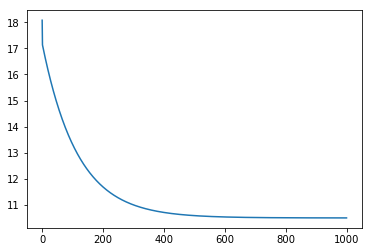

In [80]:
plt.plot([i for i in range(1000)], cost)
plt.show()